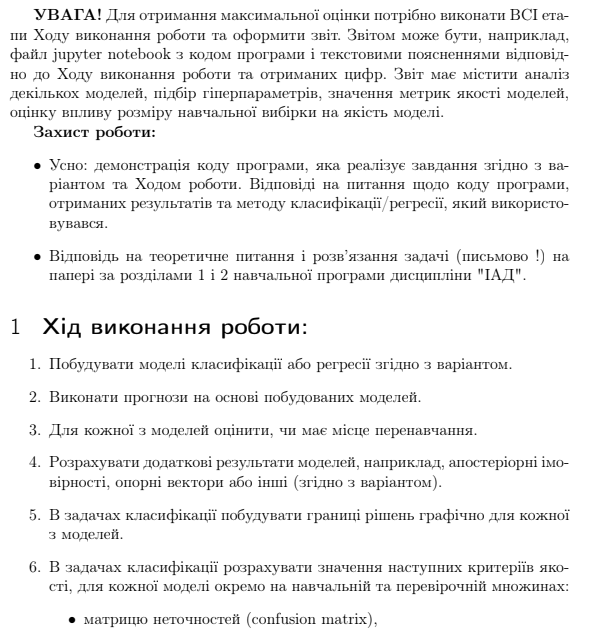
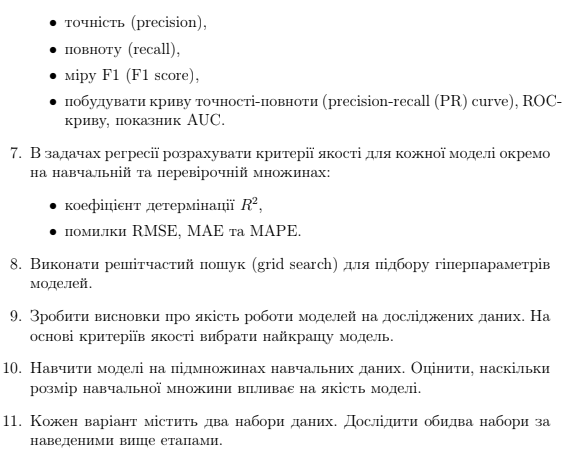
Варіант 14
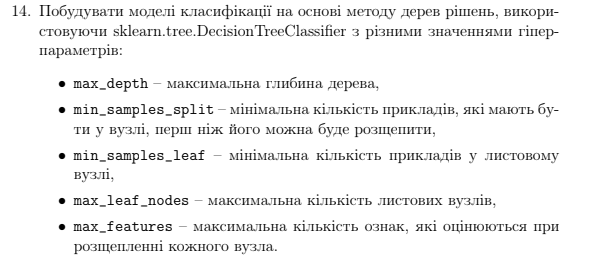
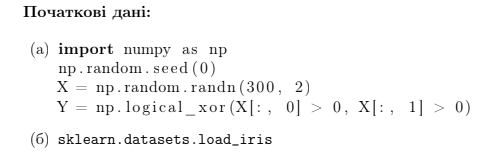

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import metrics
import graphviz 
import matplotlib.pyplot as plt

Виконаємо роботу для початкових даних (а):

Проведемо ініціалізацію даних

In [57]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

#Розіб'ємо набір перевірки на навчальну і тестову множини
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Визначимо наступні моделі класифікації на основі методу дерев рішень з різними значеннями гіперпараметрів.

In [58]:
model_a1 = DecisionTreeClassifier(max_depth=10, min_samples_split=3,
                                     min_samples_leaf=5, max_leaf_nodes=7,
                                     max_features=2)

model_a2 = DecisionTreeClassifier(max_depth=2, min_samples_split=70,
                                      min_samples_leaf=50, max_leaf_nodes=4,
                                      max_features=2)

model_a3 = DecisionTreeClassifier(max_depth=3, min_samples_split=2,
                                      min_samples_leaf=10, max_leaf_nodes=10,
                                      max_features=1)

In [4]:
def display_tree(model, feature_names=None, class_names=None):
    dot_data = export_graphviz(model, out_file=None, 
                             feature_names=feature_names,  
                             class_names=class_names,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    
    print("Tree for model", model)
    graph = graphviz.Source(dot_data)   
    display(graph)

Tree for model DecisionTreeClassifier(max_depth=10, max_features=2, max_leaf_nodes=7,
                       min_samples_leaf=5, min_samples_split=3)


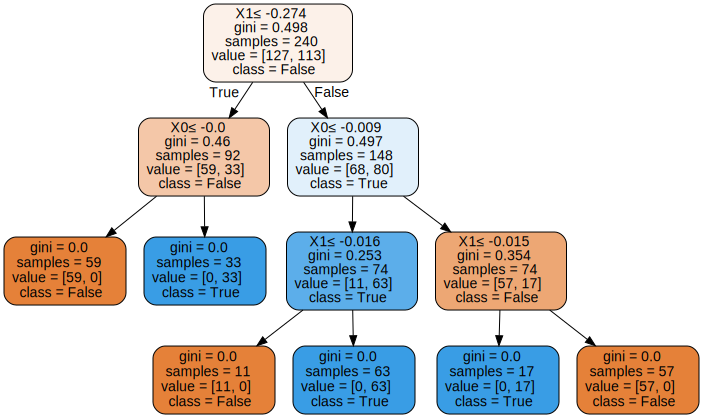

In [5]:
model_a1.fit(X_train, y_train)
display_tree(model_a1, class_names=['False', 'True'])

Tree for model DecisionTreeClassifier(max_depth=2, max_features=2, max_leaf_nodes=4,
                       min_samples_leaf=50, min_samples_split=70)


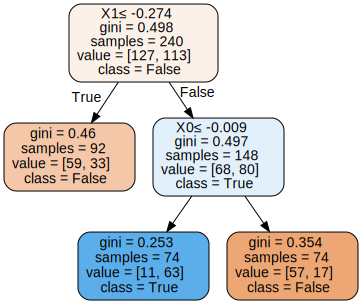

In [6]:
model_a2.fit(X_train, y_train)
display_tree(model_a2, class_names=['False', 'True'])

Tree for model DecisionTreeClassifier(max_depth=3, max_features=1, max_leaf_nodes=10,
                       min_samples_leaf=10)


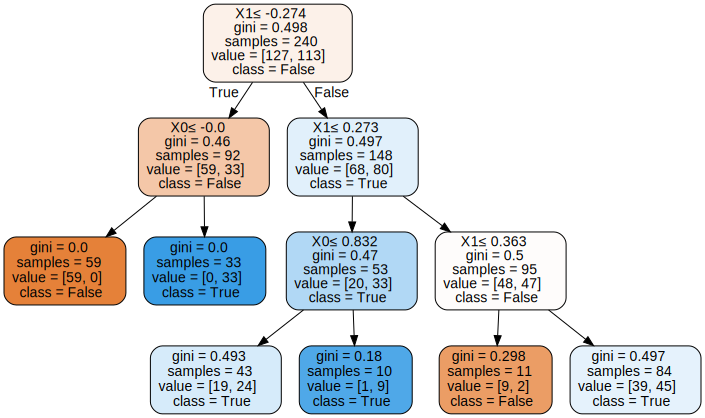

In [13]:
model_a3.fit(X_train, y_train)
display_tree(model_a3, class_names=['False', 'True'])

Виконаємо прогнози на основі побудованих моделей

In [8]:
y_pred_m1 = model_a1.predict(X_valid)   
y_pred_m2 = model_a2.predict(X_valid)
y_pred_m3 = model_a3.predict(X_valid)

Наступна функція visualize_classifier() будує границі рішень

In [9]:
def visualize_classifier(model, x, y, n_classes=2, plot_colors = "rg", class_names=None):
        
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
        
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn)

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(x[idx, 0], x[idx, 1], c=color, label=class_names[i],
                        cmap=plt.cm.RdYlGn, edgecolor='black', s=15)
        
    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

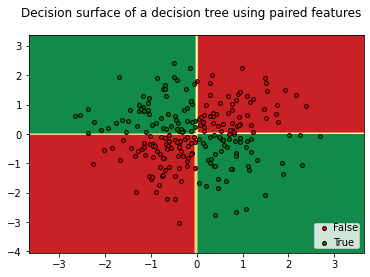

In [10]:
visualize_classifier(model_a1, X_train, y_train, n_classes=2, class_names=['False', 'True'])

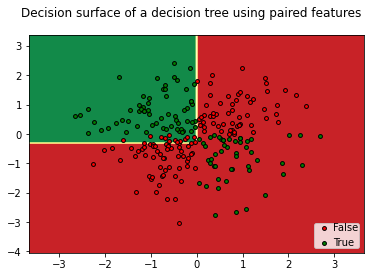

In [11]:
visualize_classifier(model_a2, X_train, y_train, n_classes=2, class_names=['False', 'True'])

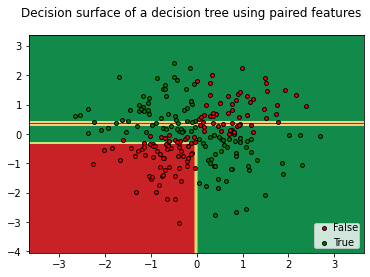

In [14]:
visualize_classifier(model_a3, X_train, y_train, n_classes=2, class_names=['False', 'True'])

Функція conf_matrix() розраховує матрицю неточностей

In [15]:
def conf_matrix(model, y_valid ,y_pred):
    cm = metrics.confusion_matrix(y_valid, y_pred, labels=model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

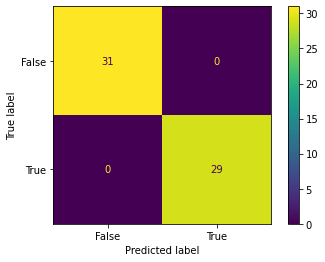

In [16]:
conf_matrix(model_a1, y_valid, y_pred_m1)

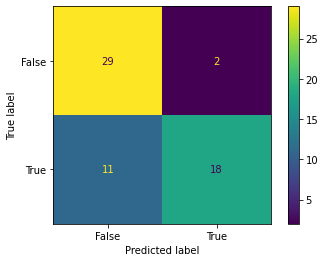

In [17]:
conf_matrix(model_a2, y_valid, y_pred_m2)

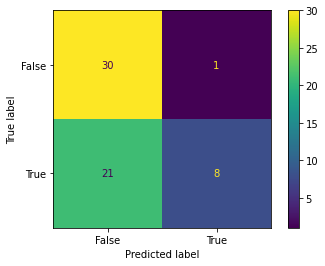

In [18]:
conf_matrix(model_a3, y_valid, y_pred_m3)

З матриць неточностей ми бачимо де наша модель помилилася. У вище наведених матрицях помилкові елементи під час класифікації вказані поза головною дiагоналю. 
Матриця неточностей дає більше уявлень не тільки про ефективність моделі прогнозування, але і про те, які класи прогнозуються правильно, які неправильно та який тип помилок допускається.

Враховуючі дані зауважені можна сказати, що матриця для 1-ї моделі є найкращою.

Розрахуємо точність (precision) для наших моделей.

In [19]:
print('Точність моделі №1:', metrics.precision_score(y_valid, y_pred_m1, average='macro'))
print('Точність моделі №2:', metrics.precision_score(y_valid, y_pred_m2, average='macro'))
print('Точність моделі №3:', metrics.precision_score(y_valid, y_pred_m3, average='macro'))     

Точність моделі №1: 1.0
Точність моделі №2: 0.8125
Точність моделі №3: 0.738562091503268


Для 1-ї моделі точність дорівнює 100%, що є дуже хорошим результатом.

Розрахуємо повноту (recall) для наших моделей.

In [20]:
print('Повнота моделі №1:', metrics.recall_score(y_valid, y_pred_m1, average='macro'))
print('Повнота моделі №2:', metrics.recall_score(y_valid, y_pred_m2, average='macro'))
print('Повнота моделі №3:', metrics.recall_score(y_valid, y_pred_m3, average='macro'))

Повнота моделі №1: 1.0
Повнота моделі №2: 0.7780867630700778
Повнота моделі №3: 0.6218020022246942


Розрахуємо міру F1 (F1 score) для наших моделей.

In [21]:
print('Міра F1 моделі №1:', metrics.f1_score(y_valid, y_pred_m1, average='macro'))
print('Міра F1 моделі №2:', metrics.f1_score(y_valid, y_pred_m2, average='macro'))
print('Міра F1 моделі №3:', metrics.f1_score(y_valid, y_pred_m3, average='macro'))

Міра F1 моделі №1: 1.0
Міра F1 моделі №2: 0.7757976430008623
Міра F1 моделі №3: 0.576379974326059


Фунція PR_ROC_curve() будує криві точності-повноти (PR) та ROC-криву і також розраховує показник AUC.

In [22]:
def PR_ROC_curve(model, y_valid, y_pred):  
    prec, recall, _ = metrics.precision_recall_curve(y_valid, y_pred,pos_label=model.classes_[1])
    pr_display = metrics.PrecisionRecallDisplay(precision=prec, recall=recall)

    fpr, tpr, _ = metrics.roc_curve(y_valid, y_pred,pos_label=model.classes_[1])
    roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)

    print('Показник AUC:', metrics.auc(fpr, tpr))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    
    pr_display.plot(ax=ax1)
    roc_display.plot(ax=ax2)
    
    plt.show()

Викличемо дану функцію для першої моделі:

Показник AUC: 1.0


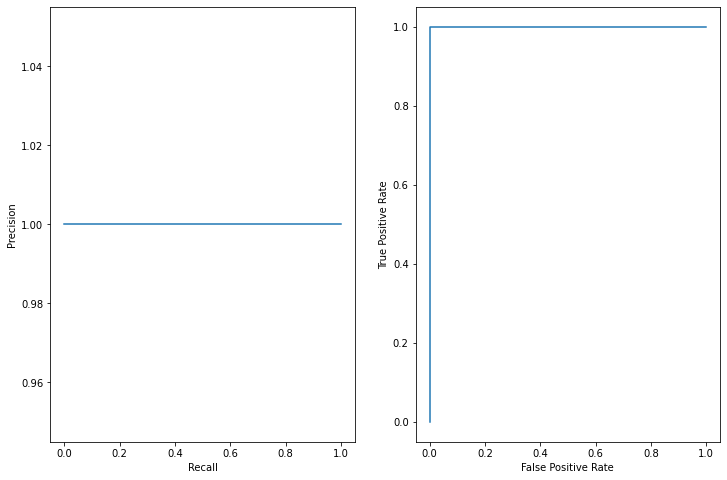

In [23]:
PR_ROC_curve(model_a1, y_valid, y_pred_m1)

Викличемо функцію PR_ROC_curve() для другої моделі:

Показник AUC: 0.7780867630700778


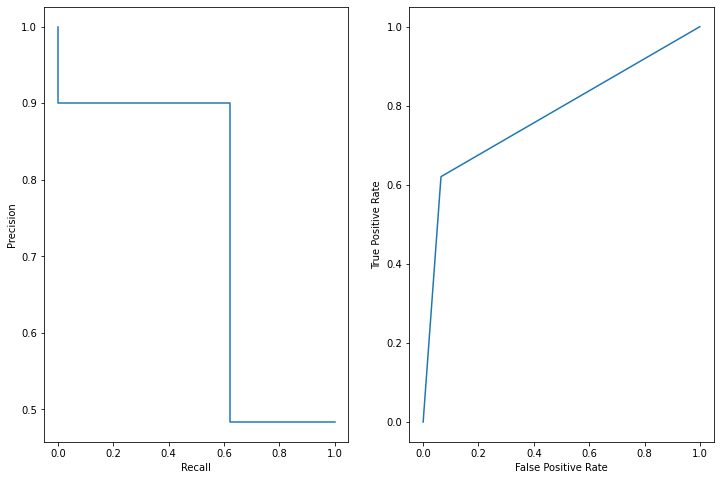

In [24]:
PR_ROC_curve(model_a2, y_valid, y_pred_m2)

Викличемо функцію PR_ROC_curve() для третьої моделі:

Показник AUC: 0.6218020022246942


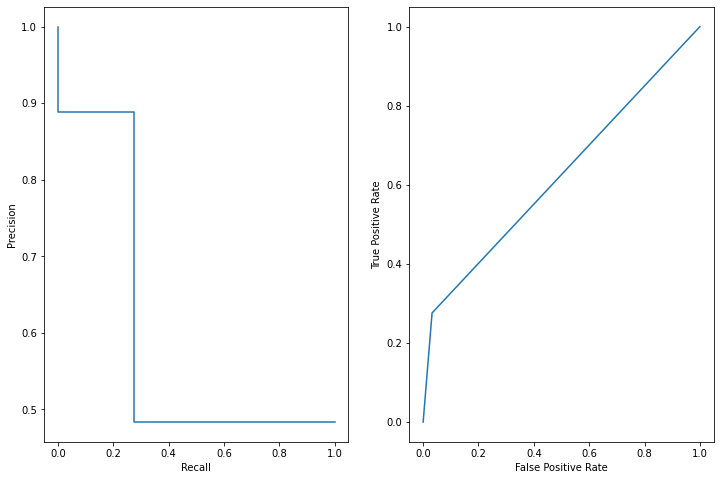

In [25]:
PR_ROC_curve(model_a3, y_valid, y_pred_m3)

З отриманих значень критеріїв якості класифікації можна зробити висновок, що найкращою серед досліджуваних моделей, є модель №1. 

Виконаємо решітчастий пошук для підбору гіперпараметрів моделей.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(2, 9),
              'min_samples_split': np.arange(2, 100, 10),
              'min_samples_leaf': np.arange(2, 100, 10),
              'max_leaf_nodes': np.arange(2, 30, 4),
              'max_features': np.arange(1,3)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'max_features': array([1, 2]),
                         'max_leaf_nodes': array([ 2,  6, 10, 14, 18, 22, 26]),
                         'min_samples_leaf': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92]),
                         'min_samples_split': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])})

In [27]:
grid.best_params_

{'max_depth': 6,
 'max_features': 2,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 22}

Побудуємо дану модель.

Tree for model DecisionTreeClassifier(max_depth=6, max_features=2, max_leaf_nodes=10,
                       min_samples_leaf=2, min_samples_split=22)


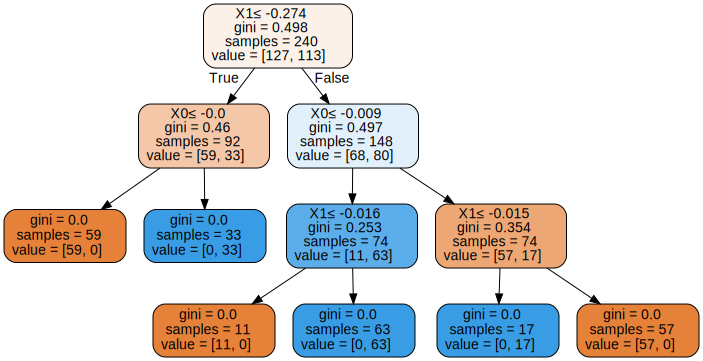

Точність моделі: 1.0


In [28]:
model = grid.best_estimator_
model.fit(X_train, y_train)
display_tree(model)
y_predict = model.predict(X_valid) 
print('Точність моделі:', metrics.precision_score(y_valid, y_predict, average='macro'))

Оцінимо, наскільки розмір навчальної множини впливає на якість моделі.

In [29]:
for size in np.linspace(0.1, 0.9, 8):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=size, test_size=1-size, random_state=0)
    model_a1.fit(X_train, y_train)
    y_predict = model_a1.predict(X_valid)
    print('Точність моделі для навчальної множини із розміром {:.1f} дорівнює: {:.2f}%'.format(size,metrics.precision_score(y_valid, y_predict)*100))

Точність моделі для навчальної множини із розміром 0.1 дорівнює: 81.68%
Точність моделі для навчальної множини із розміром 0.2 дорівнює: 65.17%
Точність моделі для навчальної множини із розміром 0.3 дорівнює: 76.60%
Точність моделі для навчальної множини із розміром 0.4 дорівнює: 97.53%
Точність моделі для навчальної множини із розміром 0.6 дорівнює: 98.44%
Точність моделі для навчальної множини із розміром 0.7 дорівнює: 100.00%
Точність моделі для навчальної множини із розміром 0.8 дорівнює: 100.00%
Точність моделі для навчальної множини із розміром 0.9 дорівнює: 100.00%


З отриманих результатів можна зробити висновок, що для того щоб отримати доволі точну модель потрібно проводити навчання принаймі на 40% даних. Але для того, щоб отримати повністю точну модель потрібно проводити навчання із використанням принаймі 70% даних.

Виконаємо роботу для початкових даних (б):

In [30]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Побудуємо моделі класифікації на основі методу дерев рішень з різними значеннями гіперпараметрів:

In [31]:
model_b1 = DecisionTreeClassifier(max_depth=10, min_samples_split=3,
                                     min_samples_leaf=5, max_leaf_nodes=7,
                                     max_features=2)

model_b2 = DecisionTreeClassifier(max_depth=3, min_samples_split=15,
                                      min_samples_leaf=20, max_leaf_nodes=3,
                                      max_features=2)

model_b3 = DecisionTreeClassifier(max_depth=5, min_samples_split=15,
                                     min_samples_leaf=15, max_leaf_nodes=5,
                                     max_features=2)

Tree for model DecisionTreeClassifier(max_depth=10, max_features=2, max_leaf_nodes=7,
                       min_samples_leaf=5, min_samples_split=3)


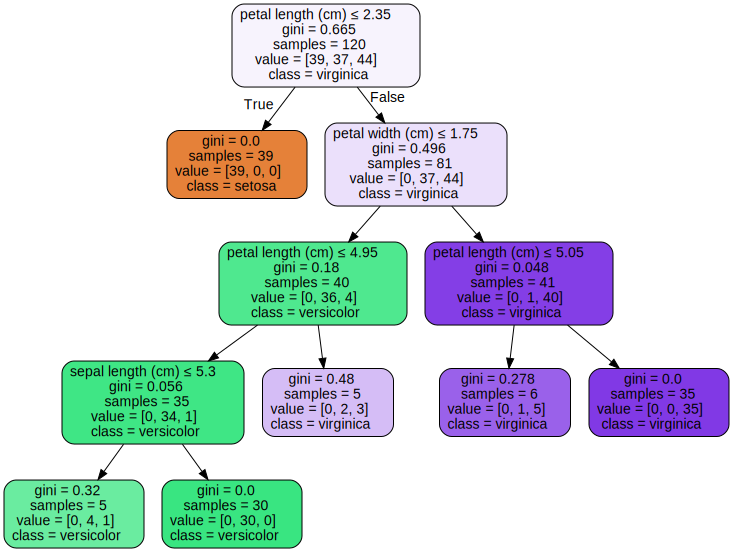

In [32]:
model_b1.fit(X_train, y_train)
display_tree(model_b1, iris.feature_names, iris.target_names)

Tree for model DecisionTreeClassifier(max_depth=3, max_features=2, max_leaf_nodes=3,
                       min_samples_leaf=20, min_samples_split=15)


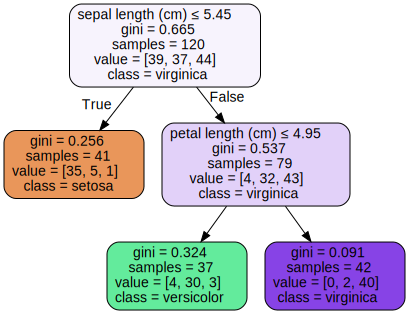

In [33]:
model_b2.fit(X_train, y_train)
display_tree(model_b2, iris.feature_names, iris.target_names)

Tree for model DecisionTreeClassifier(max_depth=5, max_features=2, max_leaf_nodes=5,
                       min_samples_leaf=15, min_samples_split=15)


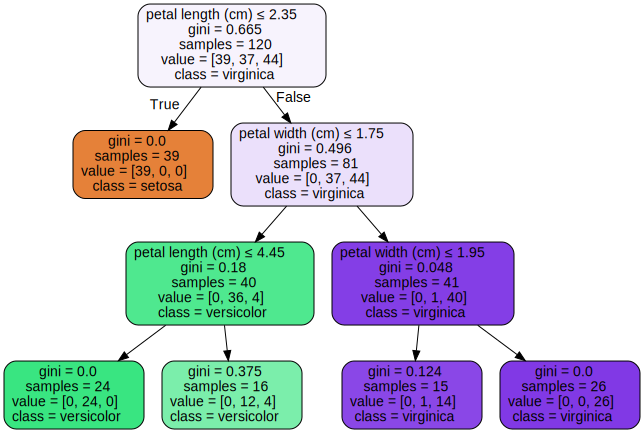

In [34]:
model_b3.fit(X_train, y_train)
display_tree(model_b3, iris.feature_names, iris.target_names)

Після визначення ми можемо використовувати модель для прогнозування навчального набору даних, щоб отримати уявлення про те, наскільки добре він навчився розподіляти простір ознак навчального набору даних.

In [35]:
y_pred_m1 = model_b1.predict(X_valid)   
y_pred_m2 = model_b2.predict(X_valid)
y_pred_m3 = model_b3.predict(X_valid)

Тепер, коли у нас є набір даних і модель, ми можемо побудувати границі рішень за допомогою функції visualize_classifier()

In [36]:
def visualize_classifier(model, X, y, n_classes=2, plot_colors = "rwb"):
    plt.figure(figsize=(16, 8)) 
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
        x = X[:, pair]
        
        model.fit(x, y)
        
        plt.subplot(2, 3, pairidx + 1)
        
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(x[idx, 0], x[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        
    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

Так як ми маємо 4 ознаки (features):

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Ми використовуємо по дві функції з набору даних і це має сенс, оскільки ми будуємо 2D-діаграму.

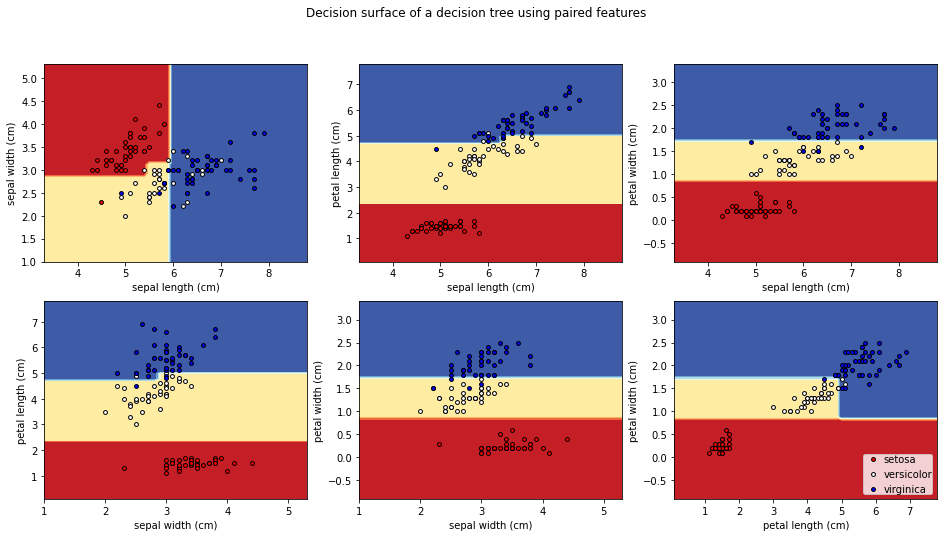

In [38]:
visualize_classifier(model_b1, X_train, y_train, n_classes=3)

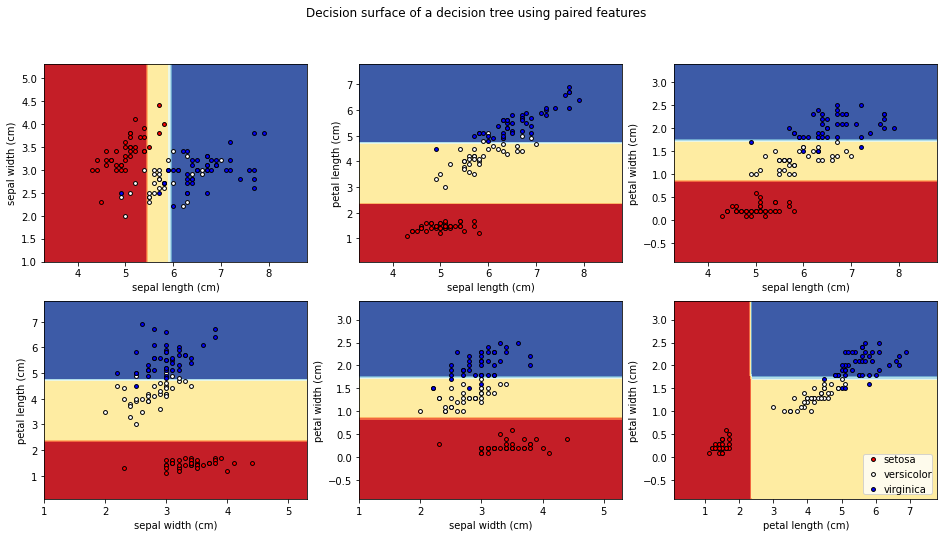

In [39]:
visualize_classifier(model_b2, X_train, y_train, n_classes=3)

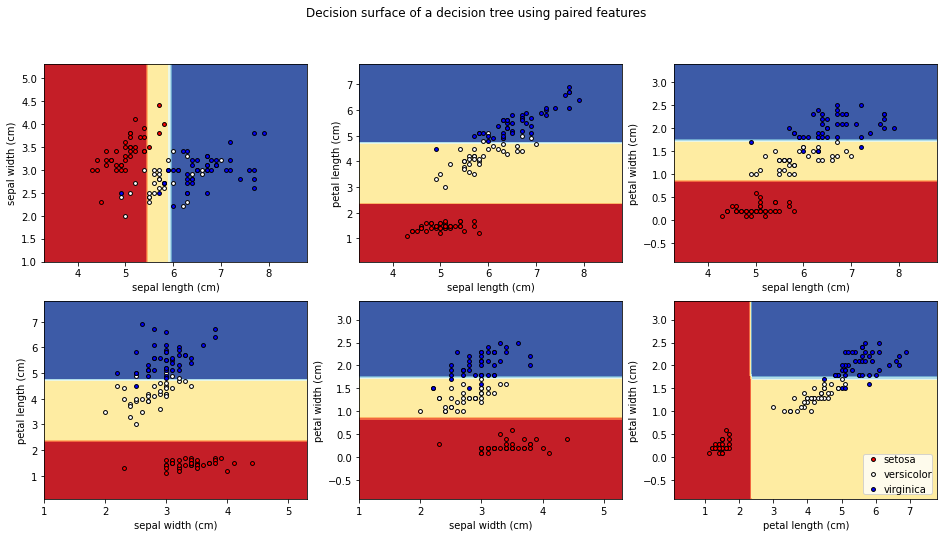

In [40]:
visualize_classifier(model_b3, X_train, y_train, n_classes=3)

Розрахуємо матриці неточностей для наших моделей.

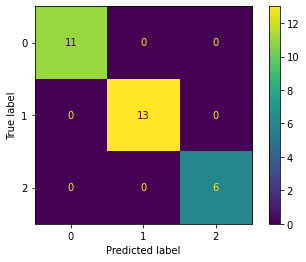

In [41]:
conf_matrix(model_b1, y_valid, y_pred_m1)

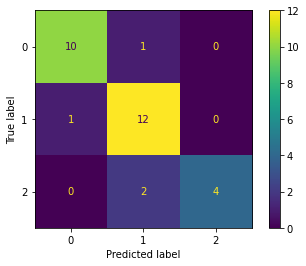

In [42]:
conf_matrix(model_b2, y_valid, y_pred_m2)

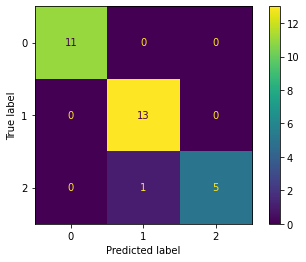

In [43]:
conf_matrix(model_b3, y_valid, y_pred_m3)

Розрахуємо точність (precision) для наших моделей.

In [44]:
print('Точність моделі №1:', metrics.precision_score(y_valid, y_pred_m1, average='macro'))
print('Точність моделі №2:', metrics.precision_score(y_valid, y_pred_m2, average='macro'))
print('Точність моделі №3:', metrics.precision_score(y_valid, y_pred_m3, average='macro'))     

Точність моделі №1: 1.0
Точність моделі №2: 0.903030303030303
Точність моделі №3: 0.9761904761904763


Розрахуємо повноту (recall) для наших моделей.

In [45]:
print('Повнота моделі №1:', metrics.recall_score(y_valid, y_pred_m1, average='macro'))
print('Повнота моделі №2:', metrics.recall_score(y_valid, y_pred_m2, average='macro'))
print('Повнота моделі №3:', metrics.recall_score(y_valid, y_pred_m3, average='macro'))

Повнота моделі №1: 1.0
Повнота моделі №2: 0.8329448329448329
Повнота моделі №3: 0.9444444444444445


Розрахуємо міру F1 (F1 score) для наших моделей.

In [46]:
print('Міра F1 моделі №1:', metrics.f1_score(y_valid, y_pred_m1, average='macro'))
print('Міра F1 моделі №2:', metrics.f1_score(y_valid, y_pred_m2, average='macro'))
print('Міра F1 моделі №3:', metrics.f1_score(y_valid, y_pred_m3, average='macro'))

Міра F1 моделі №1: 1.0
Міра F1 моделі №2: 0.8554112554112554
Міра F1 моделі №3: 0.957351290684624


Побудуємо криві точності-повноти (PR), ROC-криву і також визначимо показник AUC за допомогою функції PR_ROC_curve() 

Показник AUC: 0.6470588235294117


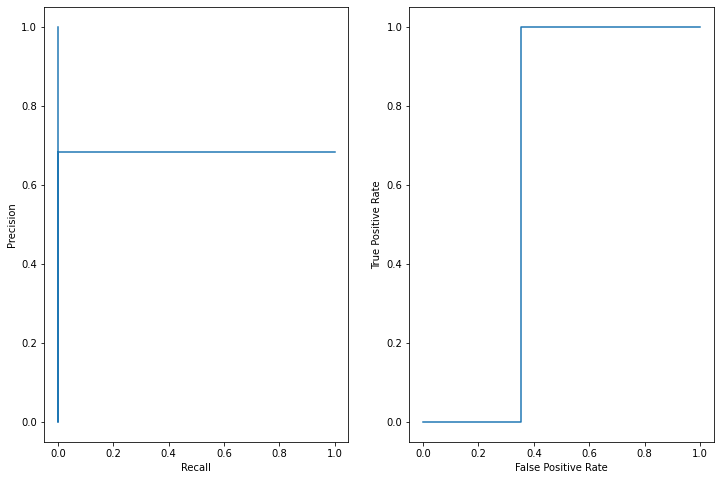

In [47]:
PR_ROC_curve(model_b1, y_valid, y_pred_m1)

Показник AUC: 0.6470588235294118


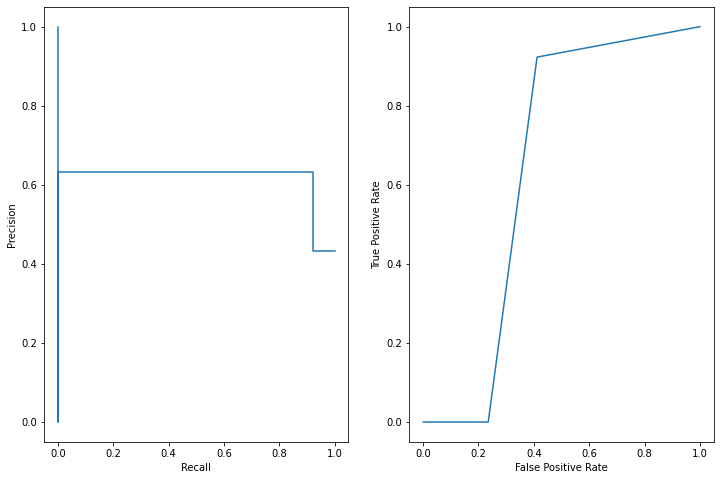

In [48]:
PR_ROC_curve(model_b2, y_valid, y_pred_m2)

Показник AUC: 0.676470588235294


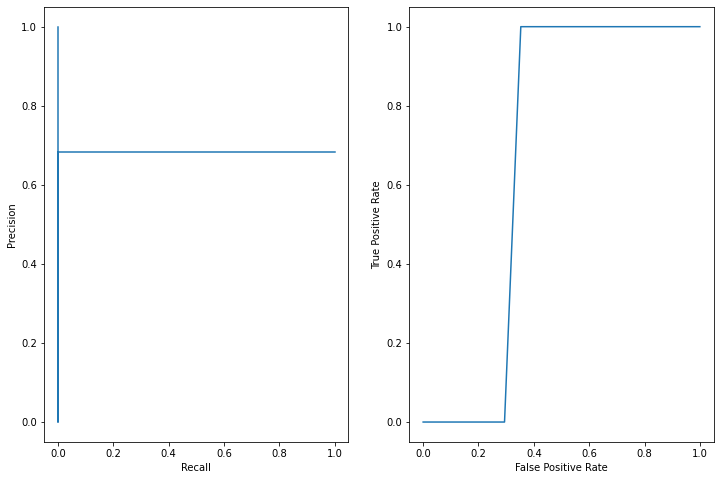

In [49]:
PR_ROC_curve(model_b3, y_valid, y_pred_m3)

З отриманих значень критеріїв якості класифікації можна зробити висновок, що найкращою серед досліджуваних моделей, є модель №1.

Виконаємо решітчастий пошук для підбору гіперпараметрів моделей.

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 9),
              'min_samples_split': np.arange(15, 30, 2),
              'min_samples_leaf': np.arange(15, 30, 2),
              'max_leaf_nodes': np.arange(3, 15, 2),
              'max_features': np.arange(1,5)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([1, 2, 3, 4]),
                         'max_leaf_nodes': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': array([15, 17, 19, 21, 23, 25, 27, 29]),
                         'min_samples_split': array([15, 17, 19, 21, 23, 25, 27, 29])})

In [51]:
grid.best_params_

{'max_depth': 3,
 'max_features': 2,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 25,
 'min_samples_split': 29}

Tree for model DecisionTreeClassifier(max_depth=3, max_features=2, max_leaf_nodes=7,
                       min_samples_leaf=25, min_samples_split=29)


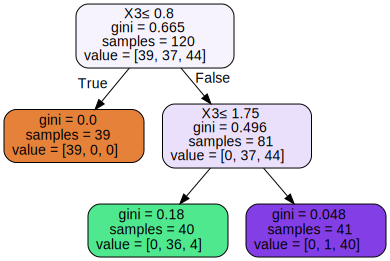

Точність моделі: 0.9761904761904763


In [52]:
model = grid.best_estimator_
model.fit(X_train, y_train)
display_tree(model)
y_predict = model.predict(X_valid) 
print('Точність моделі:', metrics.precision_score(y_valid, y_predict, average='macro'))

Оцінимо, наскільки розмір навчальної множини впливає на якість моделі.

In [56]:
for size in np.linspace(0.1, 0.9, 8):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=size, test_size=1-size, random_state=0)
    model_b1.fit(X_train, y_train)
    y_predict = model_b1.predict(X_valid)
    print('Точність моделі для навчальної множини із розміром {:.1f} дорівнює: {:.2f}%'.format(size,metrics.precision_score(y_valid, y_predict, average='macro')*100))

Точність моделі для навчальної множини із розміром 0.1 дорівнює: 94.84%
Точність моделі для навчальної множини із розміром 0.2 дорівнює: 96.21%
Точність моделі для навчальної множини із розміром 0.3 дорівнює: 95.61%
Точність моделі для навчальної множини із розміром 0.4 дорівнює: 82.67%
Точність моделі для навчальної множини із розміром 0.6 дорівнює: 91.88%
Точність моделі для навчальної множини із розміром 0.7 дорівнює: 92.67%
Точність моделі для навчальної множини із розміром 0.8 дорівнює: 100.00%
Точність моделі для навчальної множини із розміром 0.9 дорівнює: 96.30%


З отриманих результатів можна зробити висновок, що для того щоб отримати доволі точну модель достатньо обучити її принаймі на 10% від усіх даних. Але для того, щоб отримати модель із 100% точністю потрібно використовувати навчальну множину розмір якої дорівнює 80% від усіх даних. Також можна помітити, що при навчанні на вибірці із 90% даних ми отримали меншу точність моделі, ніж при 80%, тому що на даному етапі ми отримали перенавчену модель.